# I - Exploratory Data Analysis (EDA)

`In this section we'll be doing four things`:
<font color = brown>
 - Data Extraction: we'll load the dataset and have a first look at it.
 - Cleaning: We'll fill in missing values, if any.
 - Plotting: We'll create some interesting charts that'll (hopefully) spot correlations and hidden insights out of the data.
 - Assumptions: We'll formulate hypotheses from the charts.</font>

### Tweaking the style of the notebook to have centered plots

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

### Importing the Useful libraries

In [14]:
# Ignore Warnings
import warnings 
warnings.filterwarnings('ignore')

import os
import numpy as np # linear algebra library
import pandas as pd # DataFrame creation and manipulation library
#pd.set_option('display.width', 1000)
#pd.set_option('display.max_columns', 500)
#pd.display.expand_frame_repr = True

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab

# Configure visualizations
%matplotlib inline 
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 14, 10

os.listdir()

['ipl_match_prediction.ipynb',
 'test.csv',
 'data_dictionary.xlsx',
 '.git',
 'train.csv',
 'ProblemStatement.txt',
 '.ipynb_checkpoints',
 '.~lock.data_dictionary.xlsx#']

As we can see above, we have our training dataset named train.csv and our test dataset named test.csv. **We'll be using our training dataset to build our predictive classification model and our test dataset for prediction of win/loss and the likelihood probability.**

In [3]:
train_df = pd.read_csv('train.csv')

`Shape of the training Dataset`

In [4]:
print('Shape of the training dataset {}'.format(train_df.shape))

Shape of the training dataset (252, 30)


We have :
- 252 rows 
- 30 columns

In [5]:
train_df.head()

,Game ID,Team 1,Team 2,City,DayOfWeek,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125",...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
0,1,Koramangala Traffic Jammers,Whitefield Water Loggers,Whitefield,1,01-01-2012,20:00:00,6,0.49,1,...,0,3,3,120.00,5,0,6,4,11,1
1,2,Electronic City Power Savers,Silkboard Slow Movers,Silkboard,2,01-02-2012,17:00:00,7,0.44,3,...,2,18,9,215.15,4,1,4,0,5,1
2,3,Indranagar Pub Watchers,Sarjapur Water Tankers,Sarjapur,3,01-03-2012,20:30:00,11,0.23,2,...,1,18,1,300.00,3,3,0,1,10,0
3,4,Bellandur Froth Fighters,Koramangala Traffic Jammers,Koramangala,4,01-04-2012,16:00:00,6,0.61,0,...,0,5,4,100.00,4,2,3,2,16,0
4,5,Marathalli Chokers,Whitefield Water Loggers,Marathalli,5,01-05-2012,20:00:00,6,0.56,3,...,3,15,6,205.26,4,2,4,1,5,0


The *last column* **Winner (team 1=1, team 2=0)** is the target variable. If Winner = 1, that means that team 1 won the match or if Winner = 0, that implies that team 2 won the match.

`The other variables describe the match conditions and statistics for the two teams. They are our **features**.
 - Team 1 : Team batting first and bowling second
 - Team 2 : Team batting second and bowling first
 - City of match : City where the match is played
 - Day : Day of the week when the match is played
 - Date of Match : Date of the year when the match is played
 - Time of Match : Time of the day when the match is played
 - Avg Wind Speed : Average speed of the wind on the day when the match is played
 - Avg Humidity : Average humidity on the day when the match is played
 - Inn 1 Team 1 NOP R>25,SR>125 : NoP(Number of players) in Team 1 that scored more than 25 runs in first innings with a strike rate of more than  125
 - Inn 1 Team 1 NOP R<25, SR>125 : NoP(Number of players) in Team 1 that scored less than 25 runs in first innings with a strike rate of more than  125
 - Inn 1 Team 1 Total 4s : Total Number of 4s hit by Team 1 in the first innings
 - Inn 1 Team 1 Total 6s : Total Number of 6s hit by Team 1 in the first innings
 - Inn 1 Team 1 Max Strike Rate_ALLBatsmen : Maximum strike rate achieved including all batsmen for Team 1in first innings
 - Inn 1 Team 2 NoP fast bowlers : NoP(Number of players) in Team 2 who are fast bowlers, who bowl in first innings
 - Inn 1 Team 2 NoP Spinners : NoP(Number of players) in Team 2 who are spinners, who bowl in first innings
 - Inn 1 Team 2 wickets taken_catches_runout : Number of wickets taken by Team 2 in the first innings through Catches and Run Out performed through the assistance of fielders
 - Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping : Number of wickets taken by Team 2 in the first innings in the manner of 'Bowled', 'Leg before wicket','catch by wicket-keeper' and 'stumping by wicket-keeper'
 - Inn 1 Team 2 Extras conceded in_wides_No Balls : Total Number Extra runs conceded by Team 2 in the first innings in the manner of 'Wide ball' and 'No ball'
 - Inn 2 Team 2 NOP R>25,SR>125 : NoP(Number of players) in Team 2 that scored more than 25 runs in seond innings with a strike rate of more than  125
 - Inn 2 Team 2 NOP R<25, SR>125 : NoP(Number of players) in Team 2 that scored less than 25 runs in second innings with a strike rate of more than  125
 - Inn 2 Team 2 Total 4s : Total Number of 4s hit by Team 2 in the second innings
 - Inn 2 Team 2 Total 6s : Total Number of 6s hit by Team 2 in the second innings
 - Inn 2 Team 2 Max Strike Rate_ALLBatsmen : Maximum strike rate achieved including all batsmen for Team 2 in second innings
 - Inn 2 Team 1 NoP fast bowlers : NoP(Number of players) in Team 1 who are fast bowlers, who bowl in second innings
 - Inn 2 Team 1 NoP Spinners : NoP(Number of players) in Team 1 who are spinners, who bowl in second innings
 - Inn 2 Team 1 wickets taken_catches_runout : Number of wickets taken by Team 1 in the second innings through Catches and Run Out performed through the assistance of fielders
 - Inn 2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping : Number of wickets taken by Team 1 in the second innings in the manner of 'Bowled', 'Leg before wicket','catch by wicket-keeper' and 'stumping by wicket-keeper'
 - Inn 2 Team 1 Extras conceded in_wides_No Balls : Total Number Extra runs conceded by Team 1 in the second innings in the manner of 'Wide ball' and 'No ball'

In [16]:
train_df.describe()

# High-level simple statistical description of the numerical features. This can be done using the describe method.

,Game ID,DayOfWeek,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",Inn 1 Team 1 Total 4s,Inn 1 Team 1 Total 6s,Inn 1 Team 1 Max Strike Rate_ALLBatsmen,Inn 1 Team 2 NoP fast bowlers,Inn 1 Team 2 NoP Spinners,Inn 1 Team 2 wickets taken_catches_runout,Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 1 Team 2 Extras conceded in_wides_No Balls,"Inn 2 Team 2 NOP R>25,SR>125","Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
count,252.000000,252.000000,252.000000,252.000000,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,126.500000,4.011905,7.440476,0.625198,1.43254,1.531746,13.726190,4.880952,198.511627,3.825397,2.146825,3.912698,2.246032,5.452381,1.202381,1.250000,12.658730,4.519841,188.509246,3.674603,2.146825,3.309524,2.091270,5.337302,0.440476
std,72.890329,2.000960,2.353354,0.131620,0.98566,1.185480,4.666618,2.996963,69.901951,1.006587,1.020834,1.783143,1.575138,3.664424,0.880688,1.095536,4.379712,2.753412,56.843114,1.000632,0.976961,2.119777,1.610351,3.240880,0.497432
min,1.000000,1.000000,3.000000,0.160000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.750000,2.000000,6.000000,0.560000,1.00000,1.000000,11.000000,3.000000,161.110000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,10.000000,2.750000,153.092500,3.000000,1.000000,2.000000,1.000000,3.000000,0.000000
50%,126.500000,4.000000,7.000000,0.655000,1.00000,1.000000,14.000000,5.000000,185.710000,4.000000,2.000000,4.000000,2.000000,5.000000,1.000000,1.000000,12.000000,4.000000,185.710000,4.000000,2.000000,3.000000,2.000000,5.000000,0.000000
75%,189.250000,6.000000,8.000000,0.720000,2.00000,2.000000,17.000000,7.000000,220.000000,4.000000,3.000000,5.000000,3.000000,7.000000,2.000000,2.000000,16.000000,6.000000,222.220000,4.000000,3.000000,5.000000,3.000000,7.000000,1.000000
max,252.000000,7.000000,22.000000,0.880000,4.00000,6.000000,25.000000,17.000000,600.000000,6.000000,6.000000,9.000000,8.000000,19.000000,3.000000,5.000000,25.000000,14.000000,385.710000,6.000000,5.000000,9.000000,8.000000,16.000000,1.000000


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 30 columns):
Game ID                                                             252 non-null int64
Team 1                                                              252 non-null object
Team 2                                                              252 non-null object
City                                                                252 non-null object
DayOfWeek                                                           252 non-null int64
DateOfGame                                                          252 non-null object
TimeOfGame                                                          252 non-null object
AvgWindSpeed                                                        252 non-null int64
AvgHumidity                                                         252 non-null float64
Inn 1 Team 1 NOP R>25,SR>125                                        252 non-null int64
Inn 1 Team 1 NOP R

### From the above info method of pandas we can see that the train data doesn't have any null/missing values.

In [53]:
train_df.dtypes

Game ID                                                               int64
Team 1                                                               object
Team 2                                                               object
City                                                                 object
DayOfWeek                                                             int64
DateOfGame                                                           object
TimeOfGame                                                           object
AvgWindSpeed                                                          int64
AvgHumidity                                                         float64
Inn 1 Team 1 NOP R>25,SR>125                                          int64
Inn 1 Team 1 NOP R<25, SR>125                                         int64
Inn 1 Team 1 Total 4s                                                 int64
Inn 1 Team 1 Total 6s                                                 int64
Inn 1 Team 1

**` From the above dtype values we see that, we have 5 object type of categorical, ordinal, etc variables`**

Let's now make some charts. <br>
Let's visualize the number of wins according to team 1

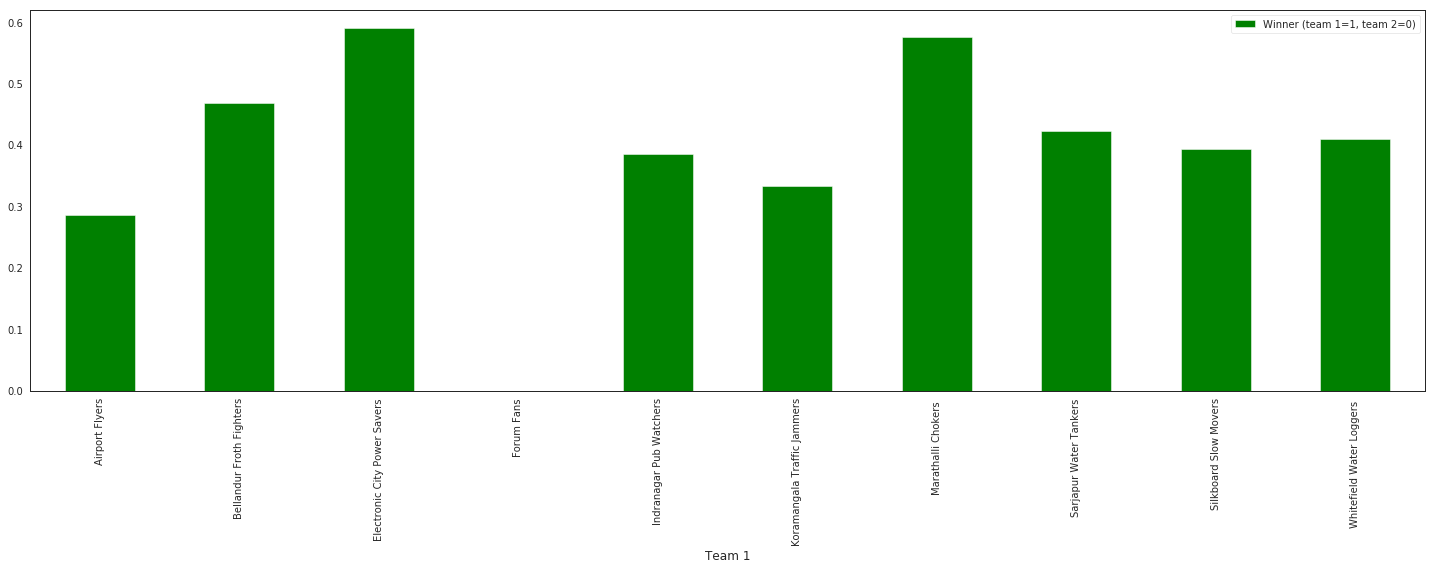

In [24]:
train_df.groupby('Team 1').agg('mean')[['Winner (team 1=1, team 2=0)']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r']);

**It looks like most teams leaving electronic city and marathalli chokers have less than 50 % chance when batting first to win and the forum fans have never won when batting first.**

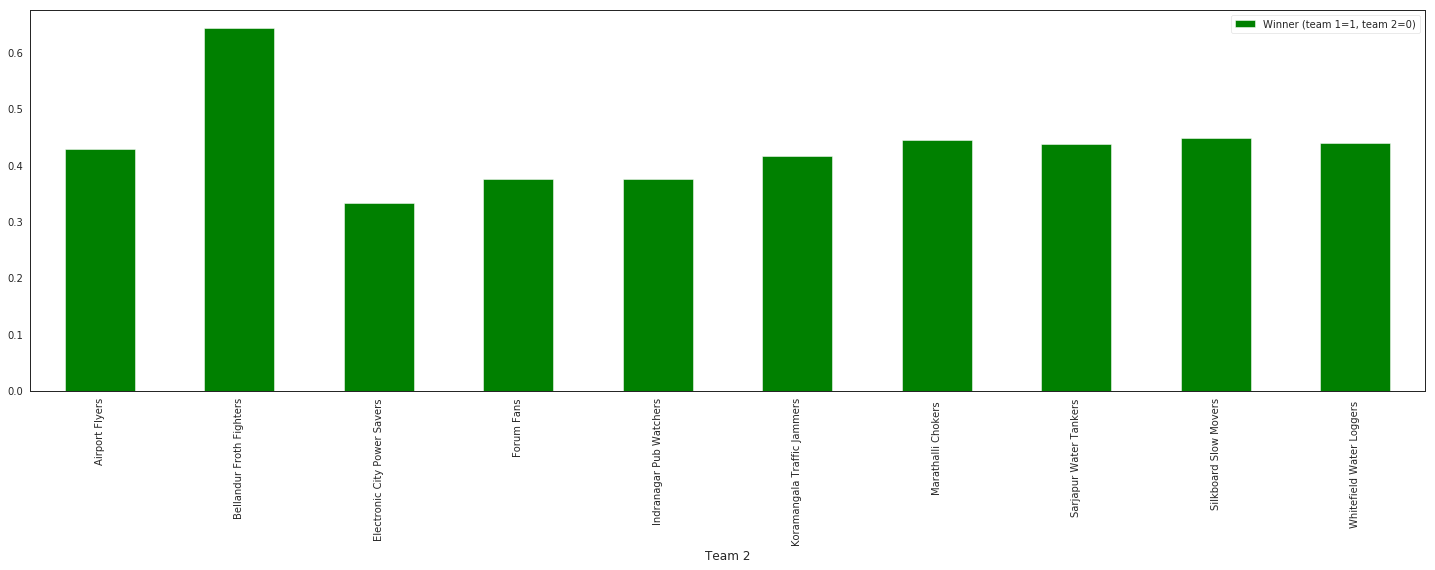

In [28]:
train_df.groupby('Team 2').agg('mean')[['Winner (team 1=1, team 2=0)']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r']);

### Have to derive some meaning from the above charts

In [10]:
def plot_correlation_map( df ):
    corr = train_df.corr()
    _ , ax = plt.subplots( figsize =( 24 , 24 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )


### A heatmap of correlation may give us a understanding of which variables are important

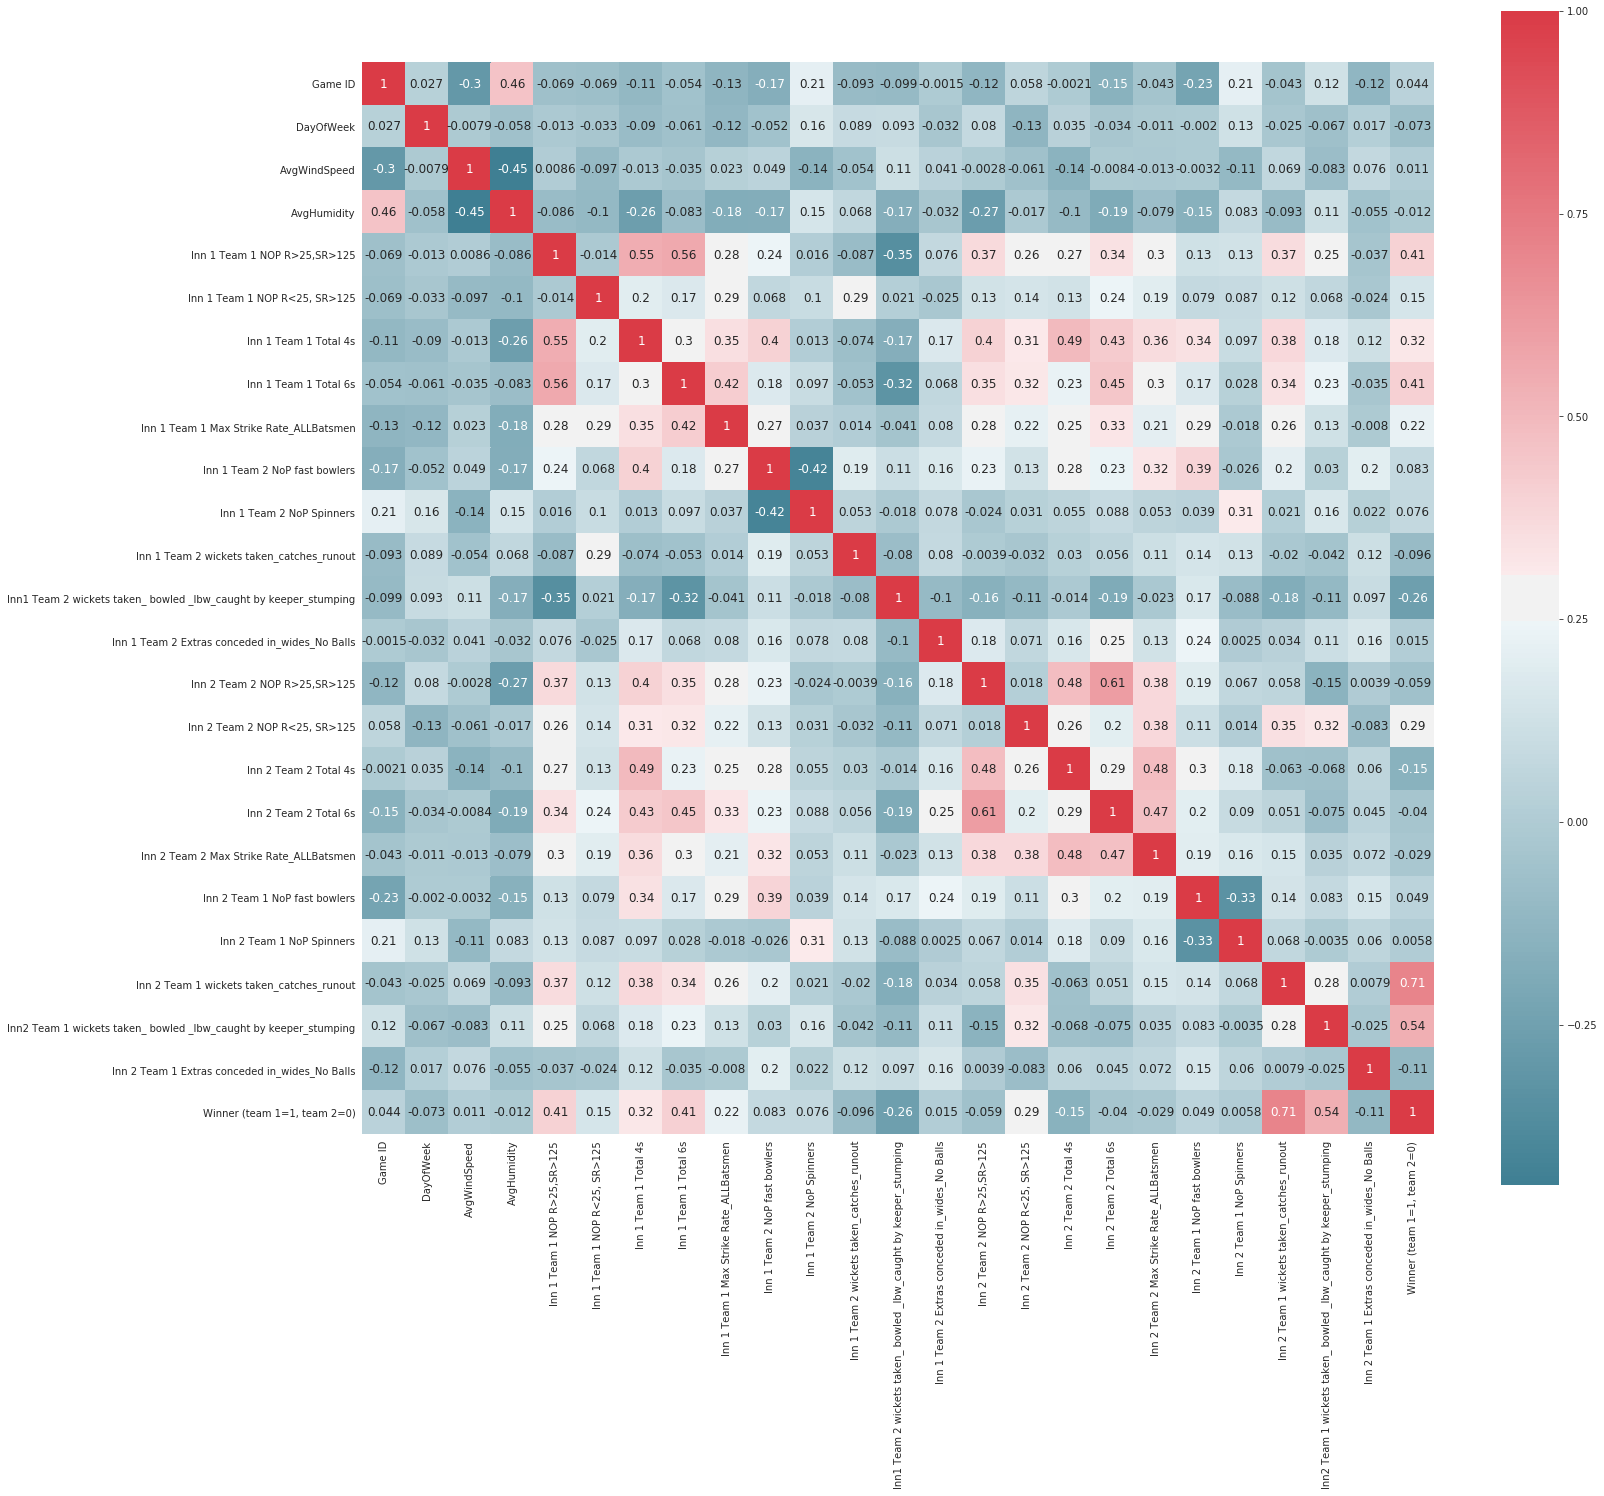

In [11]:
plot_correlation_map(train_df)

In [12]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

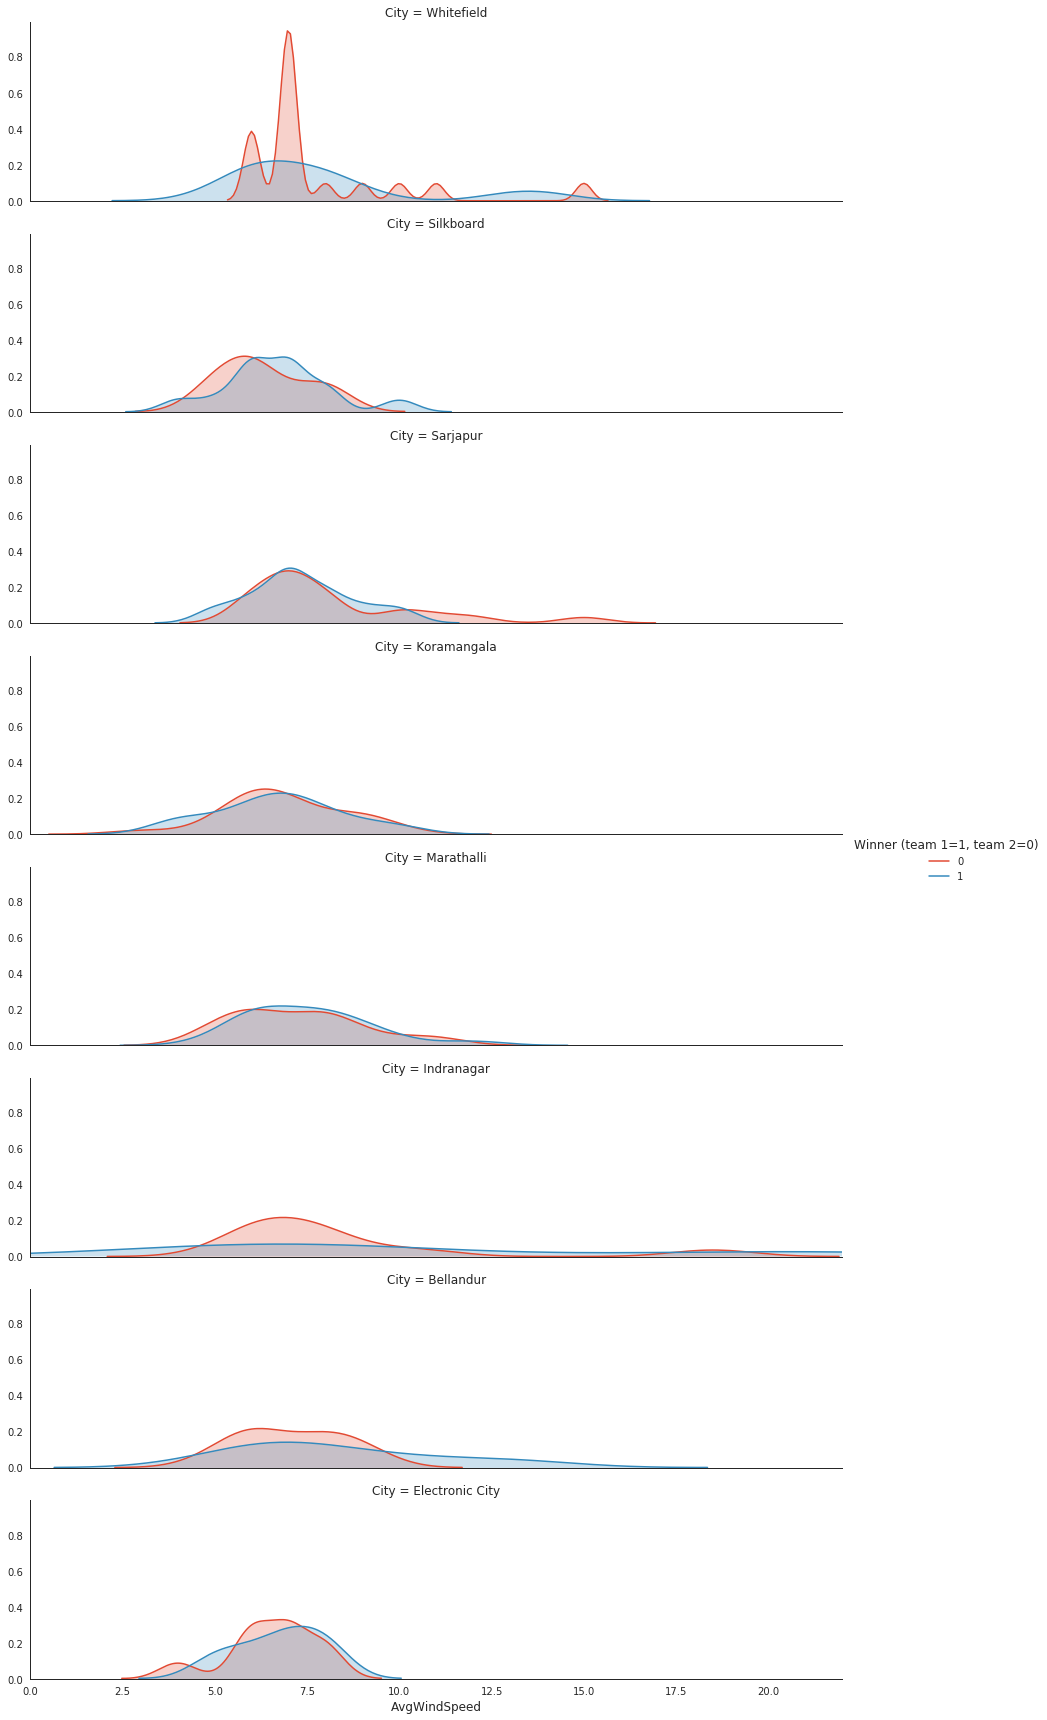

In [14]:
plot_distribution( train_df, var = 'AvgWindSpeed' , target = 'Winner (team 1=1, team 2=0)' , row = 'City' )


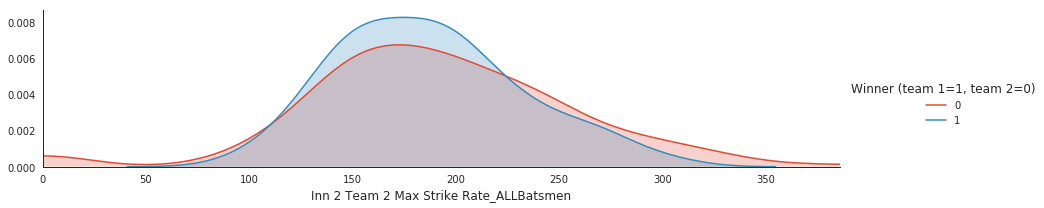

In [17]:
plot_distribution( train_df , var = 'Inn 2 Team 2 Max Strike Rate_ALLBatsmen' , target = 'Winner (team 1=1, team 2=0)'  )

In [45]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col, aspect=4 )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

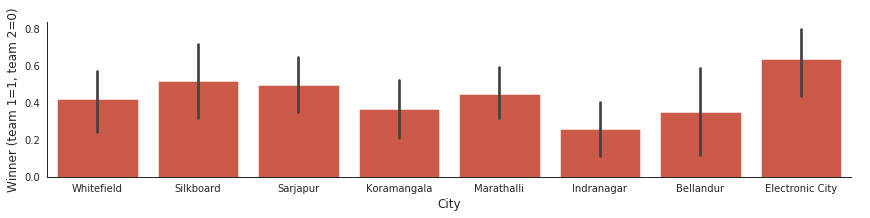

In [46]:
plot_categories(train_df, cat = 'City', target = 'Winner (team 1=1, team 2=0)')

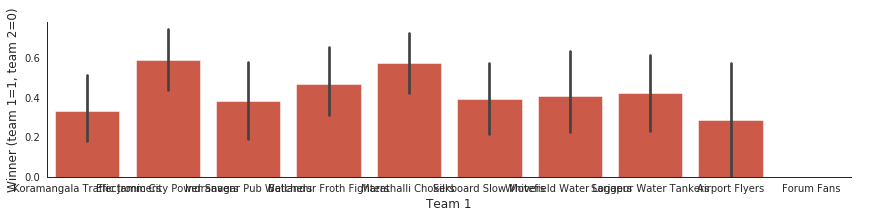

In [47]:
plot_categories(train_df, cat = 'Team 1', target = 'Winner (team 1=1, team 2=0)')

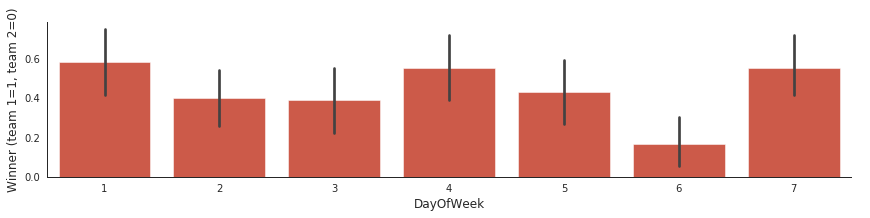

In [49]:
plot_categories(train_df, cat = 'DayOfWeek', target = 'Winner (team 1=1, team 2=0)')

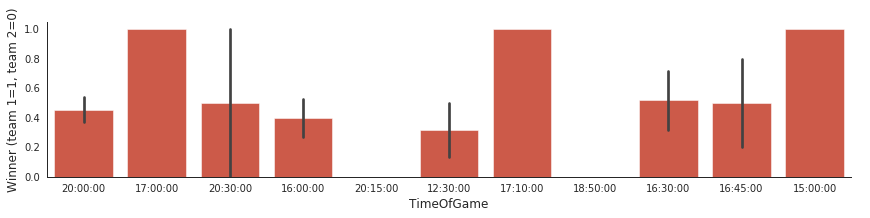

In [54]:
plot_categories(train_df, cat = 'TimeOfGame', target = 'Winner (team 1=1, team 2=0)')

In [64]:
train_df.groupby('TimeOfGame').agg('count')

,Game ID,Team 1,Team 2,City,DayOfWeek,DateOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
TimeOfGame,,,,,,,,,,,,,,,,,,,,,
12:30:00,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
15:00:00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
16:00:00,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
16:30:00,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
16:45:00,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
17:00:00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17:10:00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
18:50:00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
20:00:00,133,133,133,133,133,133,133,133,133,133,...,133,133,133,133,133,133,133,133,133,133


In [65]:
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

In [28]:
(train_df['Winner (team 1=1, team 2=0)'] == 1).sum()

111

In [85]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X, y)

In [86]:
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

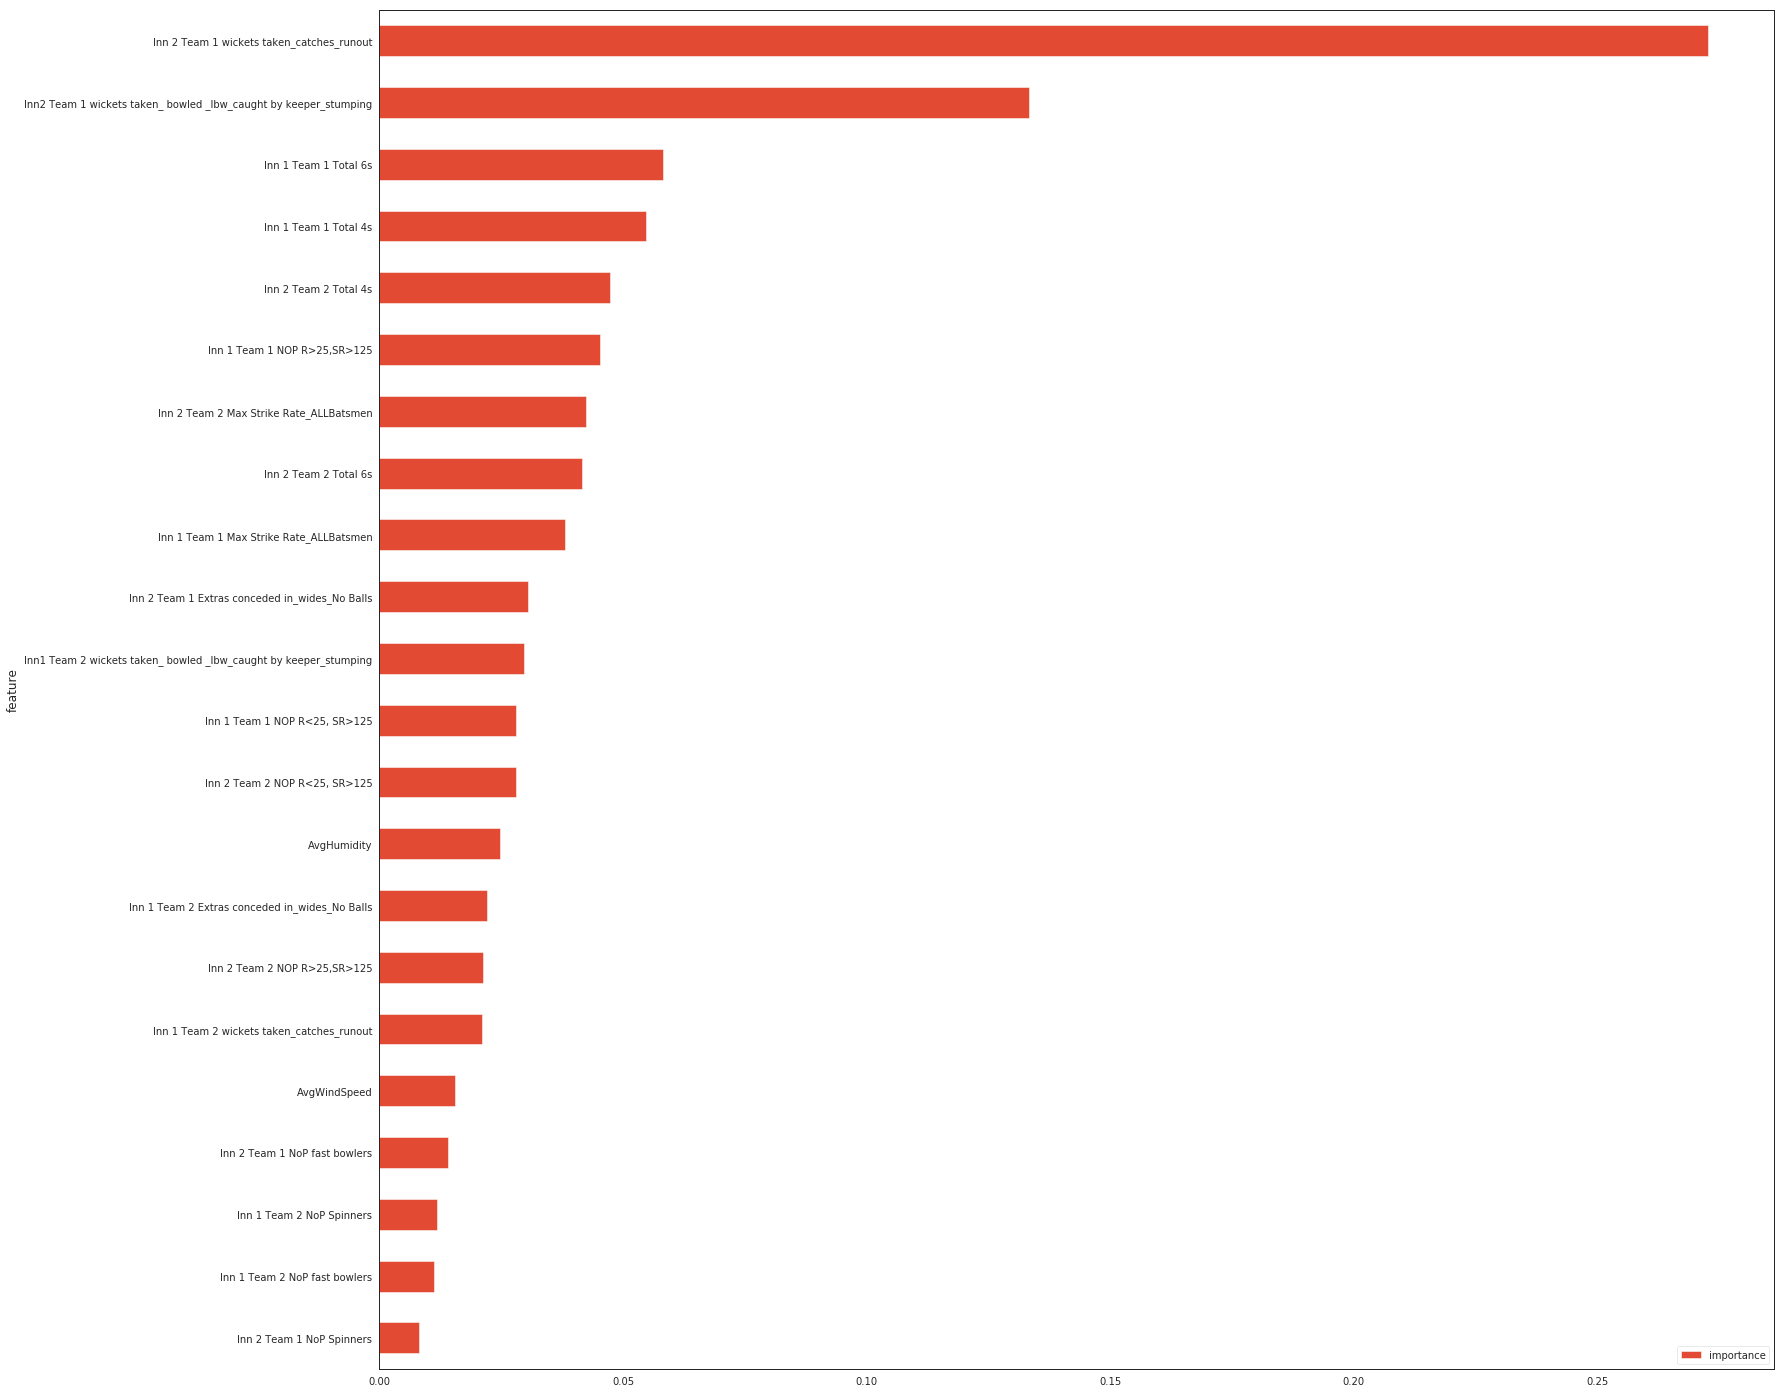

In [87]:
features.plot(kind='barh', figsize=(25, 25))

### It looks like I will have to use cross-validation or k-fold cross validation here since the dataset is very small

In [5]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Game ID,Team 1,Team 2,CityOfGame,Day,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125",...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
0,253,Electronic City Power Savers,Marathalli Chokers,Electronic City,6,01-01-2016,20:00:00,5,0.62,1,...,0,9,5,142.85,3,3,1,1,3,0
1,254,Koramangala Traffic Jammers,Sarjapur Water Tankers,Koramangala,7,01-02-2016,20:00:00,6,0.66,1,...,1,8,4,210.00,3,2,1,1,1,0
2,255,HSR High Rent Payers,Marathalli Chokers,Marathalli,1,01-03-2016,16:00:00,5,0.64,0,...,1,8,1,166.66,4,2,2,7,4,1
3,256,Indranagar Pub Watchers,Silkboard Slow Movers,Indranagar,2,01-04-2016,20:00:00,5,0.64,1,...,3,14,4,166.66,2,4,6,3,2,1
4,257,Whitefield Water Loggers,Sarjapur Water Tankers,Whitefield,3,01-05-2016,16:00:00,5,0.62,2,...,2,13,2,160.00,4,2,6,1,2,1


In [6]:
test_df.shape

(76, 30)

In [ ]:
### Using Groupby to create charts

data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, colors=['g', 'r']);

In [10]:
train_df.describe()

,Game ID,DayOfWeek,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",Inn 1 Team 1 Total 4s,Inn 1 Team 1 Total 6s,Inn 1 Team 1 Max Strike Rate_ALLBatsmen,Inn 1 Team 2 NoP fast bowlers,...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
count,252.000000,252.000000,252.000000,252.000000,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,126.500000,4.011905,7.440476,0.625198,1.43254,1.531746,13.726190,4.880952,198.511627,3.825397,...,1.250000,12.658730,4.519841,188.509246,3.674603,2.146825,3.309524,2.091270,5.337302,0.440476
std,72.890329,2.000960,2.353354,0.131620,0.98566,1.185480,4.666618,2.996963,69.901951,1.006587,...,1.095536,4.379712,2.753412,56.843114,1.000632,0.976961,2.119777,1.610351,3.240880,0.497432
min,1.000000,1.000000,3.000000,0.160000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.750000,2.000000,6.000000,0.560000,1.00000,1.000000,11.000000,3.000000,161.110000,3.000000,...,0.000000,10.000000,2.750000,153.092500,3.000000,1.000000,2.000000,1.000000,3.000000,0.000000
50%,126.500000,4.000000,7.000000,0.655000,1.00000,1.000000,14.000000,5.000000,185.710000,4.000000,...,1.000000,12.000000,4.000000,185.710000,4.000000,2.000000,3.000000,2.000000,5.000000,0.000000
75%,189.250000,6.000000,8.000000,0.720000,2.00000,2.000000,17.000000,7.000000,220.000000,4.000000,...,2.000000,16.000000,6.000000,222.220000,4.000000,3.000000,5.000000,3.000000,7.000000,1.000000
max,252.000000,7.000000,22.000000,0.880000,4.00000,6.000000,25.000000,17.000000,600.000000,6.000000,...,5.000000,25.000000,14.000000,385.710000,6.000000,5.000000,9.000000,8.000000,16.000000,1.000000


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 30 columns):
Game ID                                                             252 non-null int64
Team 1                                                              252 non-null object
Team 2                                                              252 non-null object
City                                                                252 non-null object
DayOfWeek                                                           252 non-null int64
DateOfGame                                                          252 non-null object
TimeOfGame                                                          252 non-null object
AvgWindSpeed                                                        252 non-null int64
AvgHumidity                                                         252 non-null float64
Inn 1 Team 1 NOP R>25,SR>125                                        252 non-null int64
Inn 1 Team 1 NOP R

In [8]:
set(train_df['Team 1'])

{'Airport Flyers',
 'Bellandur Froth Fighters',
 'Electronic City Power Savers',
 'Forum Fans',
 'Indranagar Pub Watchers',
 'Koramangala Traffic Jammers',
 'Marathalli Chokers ',
 'Sarjapur Water Tankers',
 'Silkboard Slow Movers',
 'Whitefield Water Loggers '}

In [16]:
train_df['Team 2'].unique()

array(['Whitefield Water Loggers ', 'Silkboard Slow Movers',
       'Sarjapur Water Tankers', 'Koramangala Traffic Jammers',
       'Indranagar Pub Watchers', 'Marathalli Chokers ',
       'Electronic City Power Savers', 'Bellandur Froth Fighters',
       'Forum Fans', 'Airport Flyers'], dtype=object)

In [15]:
test_df['Team 1'].unique()

array(['Electronic City Power Savers', 'Koramangala Traffic Jammers',
       'HSR High Rent Payers', 'Indranagar Pub Watchers',
       'Whitefield Water Loggers ', 'Bellandur Froth Fighters',
       'Marathalli Chokers ', 'Silkboard Slow Movers',
       'Sarjapur Water Tankers'], dtype=object)

### K-Nearest neighbors can be a reasonable baseline for comparison

In [75]:
X = train_df.drop(columns = ['Game ID', 'Team 1', 'Team 2', 'City', 'DayOfWeek', 'DateOfGame', 'TimeOfGame', 'Winner (team 1=1, team 2=0)'])
y = train_df.iloc[:, -1]

In [67]:
X = train_df
y = train_df.iloc[:, -1]

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [84]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.87


In [58]:
train_df.dtypes

Game ID                                                               int64
Team 1                                                               object
Team 2                                                               object
City                                                                 object
DayOfWeek                                                             int64
DateOfGame                                                           object
TimeOfGame                                                           object
AvgWindSpeed                                                          int64
AvgHumidity                                                         float64
Inn 1 Team 1 NOP R>25,SR>125                                          int64
Inn 1 Team 1 NOP R<25, SR>125                                         int64
Inn 1 Team 1 Total 4s                                                 int64
Inn 1 Team 1 Total 6s                                                 int64
Inn 1 Team 1

In [51]:
len(y_train)

189

In [52]:
y_train.sum()

83

In [66]:
train_df.columns.values

array(['Game ID', 'Team 1', 'Team 2', 'City', 'DayOfWeek', 'DateOfGame',
       'TimeOfGame', 'AvgWindSpeed', 'AvgHumidity',
       'Inn 1 Team 1 NOP R>25,SR>125', 'Inn 1 Team 1 NOP R<25, SR>125',
       'Inn 1 Team 1 Total 4s', 'Inn 1 Team 1 Total 6s',
       'Inn 1 Team 1 Max Strike Rate_ALLBatsmen',
       'Inn 1 Team 2 NoP fast bowlers', 'Inn 1 Team 2 NoP Spinners',
       'Inn 1 Team 2 wickets taken_catches_runout',
       'Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping',
       'Inn 1 Team 2 Extras conceded in_wides_No Balls',
       'Inn 2 Team 2 NOP R>25,SR>125', 'Inn 2 Team 2 NOP R<25, SR>125',
       'Inn 2 Team 2 Total 4s', 'Inn 2 Team 2 Total 6s',
       'Inn 2 Team 2 Max Strike Rate_ALLBatsmen',
       'Inn 2 Team 1 NoP fast bowlers', 'Inn 2 Team 1 NoP Spinners',
       'Inn 2 Team 1 wickets taken_catches_runout',
       'Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping',
       'Inn 2 Team 1 Extras conceded in_wides_No Balls',
       'Win

In [70]:
train_df['TimeOfGame'].unique()

array(['20:00:00', '17:00:00', '20:30:00', '16:00:00', '20:15:00',
       '12:30:00', '17:10:00', '18:50:00', '16:30:00', '16:45:00',
       '15:00:00'], dtype=object)

In [71]:
train_df.info()
print('-'* 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 30 columns):
Game ID                                                             252 non-null int64
Team 1                                                              252 non-null object
Team 2                                                              252 non-null object
City                                                                252 non-null object
DayOfWeek                                                           252 non-null int64
DateOfGame                                                          252 non-null object
TimeOfGame                                                          252 non-null object
AvgWindSpeed                                                        252 non-null int64
AvgHumidity                                                         252 non-null float64
Inn 1 Team 1 NOP R>25,SR>125                                        252 non-null int64
Inn 1 Team 1 NOP R